#1 Criminal investigation

##1.1 Introduction
##1.2 Most and least frequent outgoing numbers
> 1. Identify the 3 numbers with the most counts of outgoing calls.

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [ ]:
phone = pd.DataFrame(pd.read_excel('phone_data.xlsx'))
phone.head()

,Date,Start time,From city,To city,Number called (to/from),Call type,Duration,Grand Total
0,10-14-2019,12:53:34 PM,INCOMING ON,TORONTO ON,Unknown caller,Incoming,1,0
1,10-13-2019,11:47:28 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,7,0
2,10-13-2019,11:46:53 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
3,10-13-2019,11:46:15 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
4,10-11-2019,07:03:08 PM,TORONTO ON,TORONTO ON,A_3,Outgoing,37,0


In [ ]:
outgoing_phone = phone.loc[phone['Call type'] =='Outgoing']
outgoing_counts = outgoing_phone.groupby('Number called (to/from)').size().reset_index(name='counts')
outgoing_counts

,Number called (to/from),counts
0,A_1,111
1,A_2,2
2,A_3,2
3,A_4,12
4,A_5,48
5,B_1,2
6,B_2,4
7,B_3,28
8,B_4,3
9,B_5,1


In [ ]:
print("3 numbers with the most counts of outgoing calls is")
outgoing_counts.sort_values(by='counts',ascending=False, inplace=True)
outgoing_counts.iloc[:3]

3 numbers with the most counts of outgoing calls is


,Number called (to/from),counts
0,A_1,111
4,A_5,48
7,B_3,28


>2. Identify the numbers with the least counts of outgoing calls. If there are ties (e.g. 1
phone call for many numbers) then identify all numbers.

In [ ]:
#the minimum number of counts of outgoing calls
min_count = outgoing_counts.iloc[-1].counts
print("the numbers with the least counts of outgoing calls are")
outgoing_counts.loc[outgoing_counts['counts']==min_count]

the numbers with the least counts of outgoing calls are


,Number called (to/from),counts
29,F_5,1
25,F_1,1
23,E_4,1
9,B_5,1
10,C_1,1
12,C_3,1
24,E_5,1
15,D_1,1
27,F_3,1
28,F_4,1


##1.3 Highest and lowest total duration of outgoing calls
>1. Repeat the same exercise as in the previous subsection, but with the total duration
per number called.

In [ ]:
sum_duration = outgoing_phone.groupby('Number called (to/from)').sum().Duration.reset_index(name='total_duration')
sum_duration

,Number called (to/from),total_duration
0,A_1,1146
1,A_2,2
2,A_3,81
3,A_4,96
4,A_5,427
5,B_1,2
6,B_2,11
7,B_3,33
8,B_4,8
9,B_5,16


In [ ]:
print ('3 numbers with the highest duration of outgoing calls:')
sum_duration.sort_values(by='total_duration',ascending=False, inplace=True)
sum_duration.iloc[:3]

3 numbers with the highest duration of outgoing calls:


,Number called (to/from),total_duration
0,A_1,1146
4,A_5,427
3,A_4,96


In [ ]:
#the lowest duration of outgoing calls
min_duration =  sum_duration.iloc[-1].total_duration
print('numbers with the lowest duration of outgoing calls:')
sum_duration.loc[sum_duration['total_duration']==min_duration]

numbers with the lowest duration of outgoing calls:


,Number called (to/from),total_duration
19,D_5,1
23,E_4,1
24,E_5,1
10,C_1,1


##1.4 Location of outgoing calls
>1. What are the number of counts for every location of outgoing calls?

In [ ]:
location_counts = outgoing_phone.groupby('From city').size().reset_index(name='counts')
location_counts

,From city,counts
0,CLAREMONT ON,1
1,NEWMARKET ON,2
2,TORONTO ON,244


In [ ]:
location_counts = outgoing_phone.groupby('To city').size().reset_index(name='counts')
location_counts

,To city,counts
0,800 SERV SERV 800 ON,1
1,866 SERV SERV 866 ON,1
2,877 SERV SERV 877 ON,1
3,888 SERV SERV 888 ON,1
4,AURORA ON,1
5,NEWMARKET ON,1
6,OAK RIDGES ON,28
7,RICHMONDHL ON,10
8,STOUFFVL ON,1
9,THORNHILL ON,3


##1.5 Incoming and Outgoing calls pattern
> 1. Calculate the total duration of incoming and outgoing calls per month.

In [ ]:
phone['Date'] = phone['Date'].str.strip()
phone['Date'] = pd.to_datetime(phone['Date'],format='%m-%d-%Y')
phone['Month'] = pd.DatetimeIndex(phone['Date']).month
phone.head()

,Date,Start time,From city,To city,Number called (to/from),Call type,Duration,Grand Total,Month
0,2019-10-14,12:53:34 PM,INCOMING ON,TORONTO ON,Unknown caller,Incoming,1,0,10
1,2019-10-13,11:47:28 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,7,0,10
2,2019-10-13,11:46:53 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0,10
3,2019-10-13,11:46:15 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0,10
4,2019-10-11,07:03:08 PM,TORONTO ON,TORONTO ON,A_3,Outgoing,37,0,10


In [ ]:
phone_monthly = phone.groupby(by=['Month','Call type']).sum().Duration.reset_index(name='monthly_duration')
table = pd.pivot_table(phone_monthly, values='monthly_duration', index=['Month'], columns=['Call type'])
table

Call type,Incoming,Outgoing
Month,,
7,84,190
8,54,281
9,244,714
10,63,621
11,87,196


>2. Plot the results in one graph for both incoming and outgoing calls.

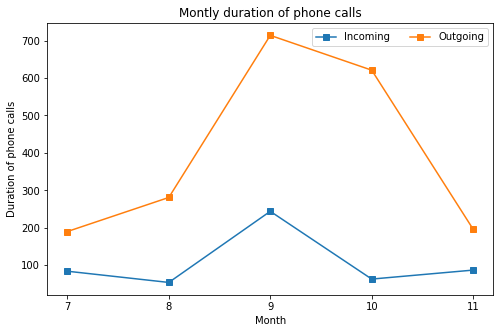

In [ ]:
fig = plt.figure(figsize=(8,5))
plt.plot(table.index,table,'-s')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Montly duration of phone calls')
plt.ylabel('Duration of phone calls')
plt.xlabel('Month')
plt.legend(table.columns, loc='best', ncol=4)
plt.show()

>3. Do you see anything unusual in the pattern? E.g. does this look like a phone line that was used for criminal activities or more like a personal phone?


In [ ]:
phone_by_number_monthly = phone.groupby(by=['Month','Number called (to/from)','Call type']).sum().Duration.reset_index(name='monthly_duration')
pd.set_option("display.max_rows", None, "display.max_columns", None)
phone_by_number_monthly

,Month,Number called (to/from),Call type,monthly_duration
0,7,A_1,Outgoing,151
1,7,A_4,Outgoing,1
2,7,B_2,Outgoing,4
3,7,B_3,Outgoing,8
4,7,E_2,Outgoing,3
5,7,E_3,Outgoing,4
6,7,E_4,Outgoing,1
7,7,E_5,Outgoing,1
8,7,F_1,Outgoing,17
9,7,Unknown caller,Incoming,84


I think this phone line is more likely to be used for criminal activities: 

1. The total outgoing duration is much greater than the incoming duration. The incoming duration stays around 50-100, however, there is a peak in September for both incoming and outgoing duration. The incoming duration is nearly 2 times higher than the normal duration, which is unusual. 
2. A personal phone line is more likely to have connections. For example, if you call a friend, he/she may call back later. However, as shown above, the destinations of the phone calls are far more diversified than the origins. This is more likely to be phone lines used for criminal activities.
3. The numbers with the most counts of outgoing calls never call back, and all incoming phone calls are from unknown caller. 

##1.6 Distribution of call
> Plot the histogram of the outbound call counts; e.g. x-axis: the call counts per client called, y-axis: number of clients called.

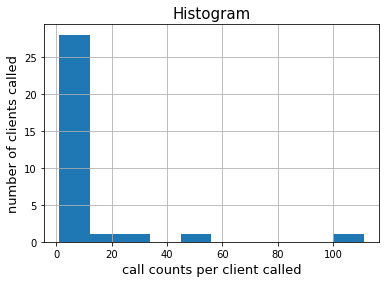

In [ ]:
outgoing_counts.hist(column='counts')
plt.title('Histogram', fontsize=15)
plt.xlabel('call counts per client called', fontsize=13)
plt.ylabel('number of clients called', fontsize=13)
plt.show()

#2 The ergodicity problem in economics

##2.3 Coding the problem
>1. Generate a pandas dataframe that simulates N coin tosses for w gamblers with the np.random.rand function. Set N=100 coin tosses and w=100 gamblers and add the preflx 'prob_' to the column name.

In [ ]:
pd.set_option("display.max_rows", 15, "display.max_columns", 20)
N = 100
w = 100
prob = pd.DataFrame(data = np.random.rand(N,w))
prob = prob.add_prefix('prob_')
prob.head()

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,prob_90,prob_91,prob_92,prob_93,prob_94,prob_95,prob_96,prob_97,prob_98,prob_99
0,0.891065,0.876635,0.838939,0.472235,0.078755,0.097124,0.534113,0.021980,0.506463,0.797093,...,0.954669,0.314923,0.819895,0.499159,0.289178,0.367405,0.561948,0.384620,0.116028,0.245032
1,0.123964,0.280285,0.400471,0.773209,0.299691,0.183959,0.257316,0.504570,0.955386,0.010145,...,0.773661,0.199907,0.960046,0.487130,0.470152,0.888135,0.728474,0.335274,0.612294,0.479640
2,0.030939,0.330930,0.362562,0.751656,0.502962,0.178587,0.312304,0.120107,0.510829,0.460157,...,0.393590,0.615828,0.968006,0.489765,0.977263,0.661882,0.972474,0.587738,0.760520,0.321665
3,0.818023,0.061978,0.564280,0.516103,0.136588,0.943162,0.899895,0.922675,0.526670,0.598932,...,0.000351,0.417731,0.306372,0.566413,0.662996,0.047948,0.334717,0.635834,0.147526,0.347916
4,0.556456,0.092033,0.708391,0.123928,0.838902,0.180987,0.942013,0.837031,0.738382,0.910453,...,0.371584,0.955182,0.468730,0.660083,0.067441,0.076799,0.784597,0.606224,0.014986,0.102758


>2. Initialize an additional w columns ['balance_' + str(x)] with the value 100 to capture the initial wealth of 100$, where: x in range(0, w).

In [ ]:
values = pd.DataFrame(100*np.ones((N,w)))
values = values.add_prefix('balance_')
df = pd.concat([prob,values],axis=1)
df.head()

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,balance_90,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99
0,0.891065,0.876635,0.838939,0.472235,0.078755,0.097124,0.534113,0.021980,0.506463,0.797093,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,0.123964,0.280285,0.400471,0.773209,0.299691,0.183959,0.257316,0.504570,0.955386,0.010145,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,0.030939,0.330930,0.362562,0.751656,0.502962,0.178587,0.312304,0.120107,0.510829,0.460157,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,0.818023,0.061978,0.564280,0.516103,0.136588,0.943162,0.899895,0.922675,0.526670,0.598932,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,0.556456,0.092033,0.708391,0.123928,0.838902,0.180987,0.942013,0.837031,0.738382,0.910453,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


>3. Create a two-level for loop that iterates through rows 1 to N first and columns w to 2w next implementing the calculation logic for every prob-balance pair:

In [ ]:
for n in range(N-1):
  for i in range(w,2*w):
    if df.iloc[n,i-w] >= 0.5:
      df.iloc[n+1,i] = df.iloc[n,i]*1.5
    else:
      df.iloc[n+1,i] = df.iloc[n,i]*0.6
df

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,balance_90,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99
0,0.891065,0.876635,0.838939,0.472235,0.078755,0.097124,0.534113,0.021980,0.506463,0.797093,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,0.123964,0.280285,0.400471,0.773209,0.299691,0.183959,0.257316,0.504570,0.955386,0.010145,...,150.000000,60.000000,150.000000,60.000000,60.000000,60.000000,150.000000,60.000000,60.000000,60.000000
2,0.030939,0.330930,0.362562,0.751656,0.502962,0.178587,0.312304,0.120107,0.510829,0.460157,...,225.000000,36.000000,225.000000,36.000000,36.000000,90.000000,225.000000,36.000000,90.000000,36.000000
3,0.818023,0.061978,0.564280,0.516103,0.136588,0.943162,0.899895,0.922675,0.526670,0.598932,...,135.000000,54.000000,337.500000,21.600000,54.000000,135.000000,337.500000,54.000000,135.000000,21.600000
4,0.556456,0.092033,0.708391,0.123928,0.838902,0.180987,0.942013,0.837031,0.738382,0.910453,...,81.000000,32.400000,202.500000,32.400000,81.000000,81.000000,202.500000,81.000000,81.000000,12.960000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.102856,0.022533,0.221767,0.442996,0.429866,0.846129,0.239727,0.160171,0.550754,0.871055,...,0.001737,1.060448,0.001737,258.898333,4045.286459,41.423733,647.245833,0.004344,41.423733,0.067869
96,0.552812,0.711135,0.035367,0.667794,0.942931,0.078634,0.351515,0.397449,0.288500,0.373427,...,0.002606,1.590671,0.002606,388.347500,2427.171875,62.135600,970.868750,0.006515,62.135600,0.040721
97,0.657854,0.708083,0.512737,0.203181,0.341166,0.003424,0.051872,0.718223,0.880162,0.390181,...,0.001564,2.386007,0.003909,233.008500,1456.303125,93.203400,1456.303125,0.009773,37.281360,0.024433
98,0.041745,0.737679,0.850916,0.006055,0.163052,0.606739,0.755473,0.846749,0.085669,0.553311,...,0.000938,1.431604,0.005864,349.512750,873.781875,55.922040,873.781875,0.005864,22.368816,0.014660


>4. Plot the time trajectories (in gamble iterations) of the wealth per gambler and calculate how many gamblers have more than their initial 100\$. What happens when you
increase N to 1,000 (Figure 2 in the original paper, except the red and blue line)? How many gamblers with more than 100$ do you have at t=1,000?

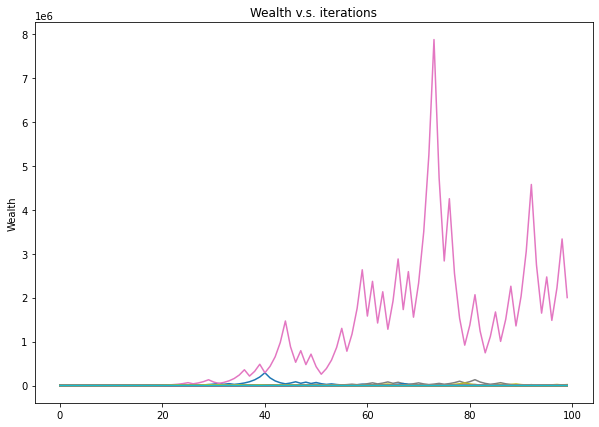

In [ ]:
#N=100
balance = df.iloc[:,w:]
balance.plot(title='Wealth v.s. iterations', figsize=(10,7),legend=None)
plt.ylabel('Wealth')
plt.show()

In [ ]:
print((balance.iloc[N-1]>100).sum(),"gamblers have more than their initial 100")

11 gamblers have more than their initial 100


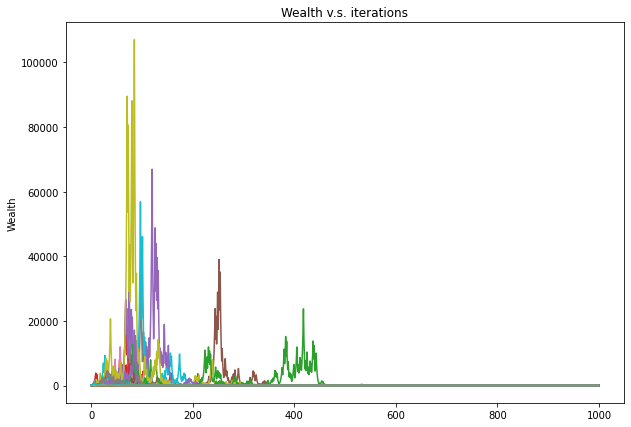

In [ ]:
#N=1000
N = 1000
prob = pd.DataFrame(data = np.random.rand(N,w))
prob = prob.add_prefix('prob_')
values = pd.DataFrame(100*np.ones((N,w)))
values = values.add_prefix('balance_')
df = pd.concat([prob,values],axis=1)
for n in range(N-1):
  for i in range(w,2*w):
    if df.iloc[n,i-w] >= 0.5:
      df.iloc[n+1,i] = df.iloc[n,i]*1.5
    else:
      df.iloc[n+1,i] = df.iloc[n,i]*0.6
balance = df.iloc[:,w:]
balance.plot(title='Wealth v.s. iterations', figsize=(10,7),legend=None)
plt.ylabel('Wealth')
plt.show()

In [ ]:
print((balance.iloc[N-1]>100).sum(),"gamblers have more than their initial 100 when t is 1000")

0 gamblers have more than their initial 100 when t is 1000


>5. Plot the time trajectories of the mean and median wealth at every time point from 0 to 1,000. Try both linear and logarithmic scaler for the wealth axis. What are your
observations?

In [ ]:
mean_median = pd.DataFrame(pd.concat([balance.mean(axis=1),balance.median(axis=1)],axis=1))
mean_median.columns = ['mean','median']
mean_median

,mean,median
0,1.000000e+02,1.000000e+02
1,1.023000e+02,6.000000e+01
2,1.105200e+02,9.000000e+01
3,1.145070e+02,9.450000e+01
4,1.216296e+02,8.100000e+01
...,...,...
995,2.282642e-07,4.760543e-21
996,1.398708e-07,4.080465e-21
997,8.704590e-08,6.120698e-21
998,1.298187e-07,6.426733e-21


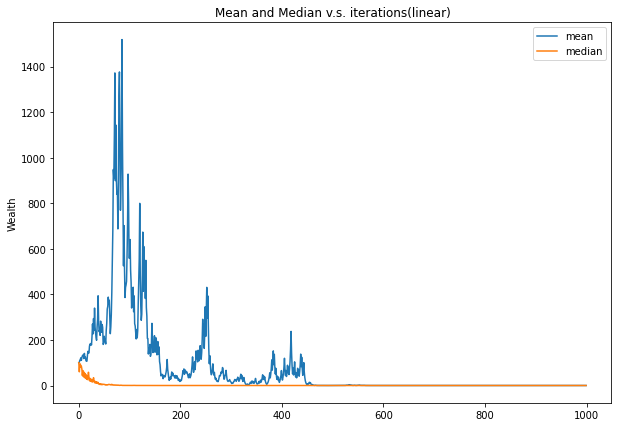

In [ ]:
mean_median.plot(title='Mean and Median v.s. iterations(linear)', figsize=(10,7))
plt.ylabel('Wealth')
plt.show()

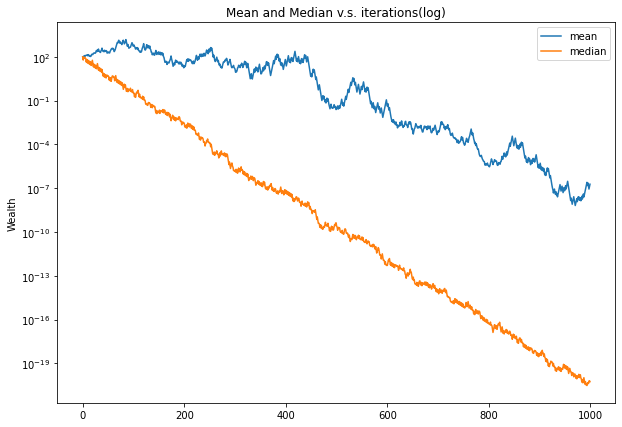

In [ ]:
mean_median.plot(title='Mean and Median v.s. iterations(log)', figsize=(10,7))
plt.ylabel('Wealth')
plt.yscale('log')
plt.show()

Both mean and median go down as N increase. The mean provides a better result than the median since it's biased more by the large values. 


The linear scaler visualizes the change of amount, there is a large difference between mean and median when t is small, they are close when t is greater than 500. 


The logarithmic scaler visualizes the change of percentage. The gap between mean and median gradually increased.

6. Repeat steps 3-5 with N=10 and w=1,000 with the following logic. How are the results dierent than the previous logic?

In [ ]:
N = 10
w = 1000
prob = pd.DataFrame(data = np.random.rand(N,w))
prob = prob.add_prefix('prob_')
values = pd.DataFrame(100*np.ones((N,w)))
values = values.add_prefix('balance_')
df = pd.concat([prob,values],axis=1)
for n in range(N-1):
  for i in range(w,2*w):
    if df.iloc[n,i-w] >= 0.5:
      df.iloc[n+1,i] = df.iloc[n,i] + 50
    else:
      df.iloc[n+1,i] = df.iloc[n,i] - 40
balance = df.iloc[:,w:]
balance

,balance_0,balance_1,balance_2,balance_3,balance_4,balance_5,balance_6,balance_7,balance_8,balance_9,...,balance_990,balance_991,balance_992,balance_993,balance_994,balance_995,balance_996,balance_997,balance_998,balance_999
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,60.0,60.0,60.0,60.0,60.0,60.0,150.0,60.0,150.0,60.0,...,150.0,60.0,150.0,60.0,150.0,150.0,60.0,150.0,60.0,60.0
2,110.0,110.0,20.0,110.0,110.0,20.0,200.0,20.0,200.0,20.0,...,200.0,110.0,110.0,20.0,110.0,200.0,110.0,110.0,20.0,20.0
3,70.0,160.0,70.0,160.0,70.0,-20.0,250.0,70.0,250.0,70.0,...,160.0,160.0,160.0,70.0,160.0,250.0,160.0,70.0,-20.0,-20.0
4,120.0,120.0,30.0,210.0,30.0,-60.0,300.0,120.0,300.0,30.0,...,210.0,210.0,120.0,30.0,120.0,210.0,120.0,120.0,30.0,30.0
5,170.0,80.0,-10.0,170.0,80.0,-10.0,350.0,170.0,260.0,80.0,...,260.0,260.0,80.0,-10.0,170.0,170.0,170.0,80.0,80.0,80.0
6,130.0,130.0,-50.0,130.0,40.0,-50.0,310.0,220.0,310.0,130.0,...,220.0,220.0,130.0,-50.0,220.0,130.0,220.0,40.0,130.0,40.0
7,90.0,180.0,0.0,180.0,90.0,0.0,360.0,180.0,270.0,90.0,...,180.0,180.0,90.0,-90.0,270.0,90.0,270.0,90.0,180.0,0.0
8,140.0,140.0,50.0,230.0,50.0,50.0,320.0,230.0,230.0,50.0,...,140.0,140.0,50.0,-130.0,230.0,140.0,320.0,140.0,230.0,-40.0
9,190.0,190.0,10.0,190.0,100.0,100.0,370.0,190.0,190.0,100.0,...,100.0,100.0,10.0,-80.0,190.0,100.0,280.0,190.0,190.0,-80.0


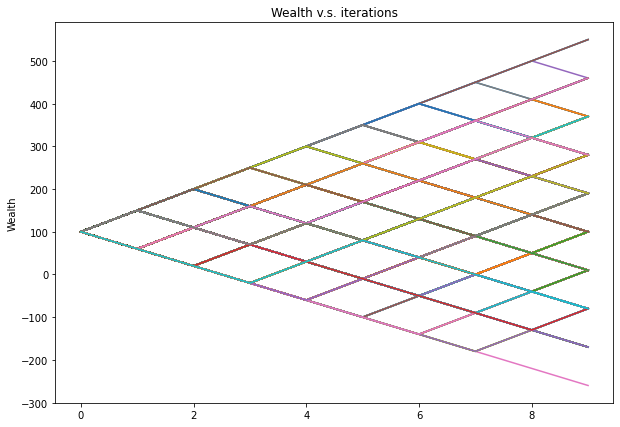

In [ ]:
balance.plot(title='Wealth v.s. iterations', figsize=(10,7),legend=None)
plt.ylabel('Wealth')
plt.show()

In [ ]:
print ((balance.iloc[N-1] > 100).sum(), 'gamblers have more than their initial 100')

480 gamblers have more than their initial 100


In [ ]:
N = 1000
prob = pd.DataFrame(data = np.random.rand(N,w))
prob = prob.add_prefix('prob_')
values = pd.DataFrame(100*np.ones((N,w)))
values = values.add_prefix('balance_')
df = pd.concat([prob,values],axis=1)
for n in range(N-1):
  for i in range(w,2*w):
    if df.iloc[n,i-w] >= 0.5:
      df.iloc[n+1,i] = df.iloc[n,i] + 50
    else:
      df.iloc[n+1,i] = df.iloc[n,i] - 40
balance = df.iloc[:,w:]
balance

,balance_0,balance_1,balance_2,balance_3,balance_4,balance_5,balance_6,balance_7,balance_8,balance_9,...,balance_990,balance_991,balance_992,balance_993,balance_994,balance_995,balance_996,balance_997,balance_998,balance_999
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,60.0,150.0,150.0,150.0,60.0,150.0,150.0,150.0,60.0,150.0,...,150.0,150.0,150.0,60.0,150.0,60.0,60.0,60.0,150.0,150.0
2,20.0,110.0,110.0,200.0,20.0,200.0,110.0,200.0,110.0,110.0,...,110.0,110.0,110.0,110.0,110.0,20.0,20.0,110.0,110.0,200.0
3,70.0,70.0,70.0,160.0,-20.0,250.0,70.0,250.0,160.0,160.0,...,70.0,70.0,70.0,160.0,160.0,70.0,-20.0,160.0,160.0,160.0
4,30.0,120.0,120.0,210.0,-60.0,210.0,30.0,210.0,210.0,120.0,...,120.0,120.0,120.0,210.0,120.0,30.0,30.0,120.0,210.0,210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4670.0,4400.0,3230.0,5660.0,2870.0,5750.0,4850.0,7010.0,4760.0,5840.0,...,4310.0,4220.0,3770.0,4130.0,5660.0,2960.0,3410.0,3590.0,6920.0,4940.0
996,4720.0,4450.0,3190.0,5710.0,2920.0,5800.0,4900.0,6970.0,4720.0,5890.0,...,4360.0,4180.0,3730.0,4090.0,5620.0,2920.0,3460.0,3550.0,6880.0,4900.0
997,4770.0,4410.0,3240.0,5760.0,2880.0,5850.0,4950.0,6930.0,4680.0,5940.0,...,4320.0,4140.0,3690.0,4140.0,5580.0,2880.0,3420.0,3510.0,6840.0,4860.0
998,4730.0,4460.0,3290.0,5720.0,2840.0,5900.0,5000.0,6980.0,4640.0,5990.0,...,4370.0,4190.0,3650.0,4100.0,5540.0,2840.0,3380.0,3560.0,6890.0,4910.0


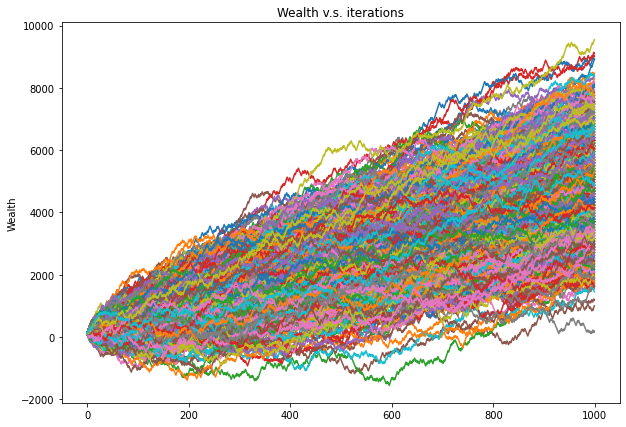

In [ ]:
balance.plot(title='Wealth v.s. iterations', figsize=(10,7),legend=None)
plt.ylabel('Wealth')
plt.show()

In [ ]:
print ((balance.iloc[N-1] > 100).sum(), 'gamblers have more than their initial 100, when t is 1000')

1000 gamblers have more than their initial 100, when t is 1000


In [ ]:
mean_median = pd.DataFrame(pd.concat([balance.mean(axis=1),balance.median(axis=1)],axis=1))
mean_median.columns = ['mean','median']
mean_median

,mean,median
0,100.00,100.0
1,104.82,60.0
2,110.90,110.0
3,115.00,160.0
4,118.20,120.0
5,121.67,80.0
6,126.85,130.0
7,130.23,90.0
8,137.21,140.0
9,141.04,100.0


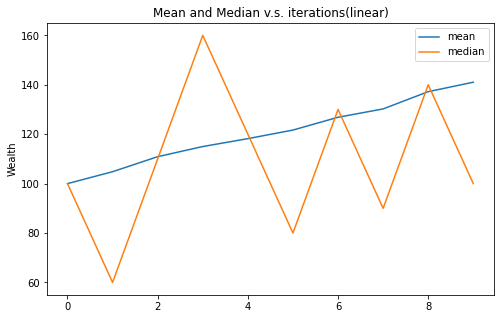

In [ ]:
mean_median.plot(title='Mean and Median v.s. iterations(linear)', figsize=(8,5))
plt.ylabel('Wealth')
plt.show()

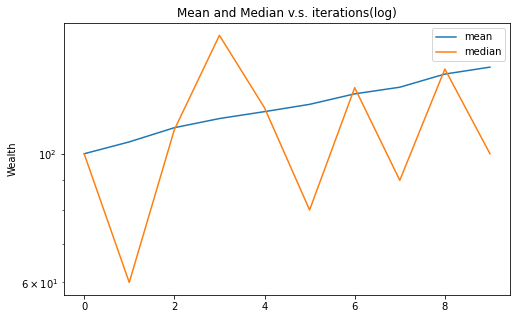

In [ ]:
mean_median.plot(title='Mean and Median v.s. iterations(log)', figsize=(8,5))
plt.ylabel('Wealth')
plt.yscale('log')
plt.show()

Both the mean and median increase as N increases. And median fluctuated around the mean. You will have more than your initial 100\$ only if you play enough games.


In the previous logic, both the mean and median decrease as N increases. You will lose all your money when you keep playing.